In [1]:
import keras
keras.__version__

'2.12.0'

In [2]:
# IMDB

from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
# 빈도가 높은 총 10000개의 단어를 사용함.

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
train_data.shape
# 가져온 리뷰의 개수는 25000개

(25000,)

In [4]:
train_labels[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [5]:
max([max(sequence) for sequence in train_data]) # for문의 결과가 앞으로 이동
# for문으로 각각의 리뷰점수 중 max를 뽑아내고, 그 중에 단어 빈도 max를 뽑는다.


9999

In [6]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):   # dimension의 default는 단어 개수
  result = np.zeros((len(sequences),dimension)) # np.zeros(25000,10000) 배열이 됨

  print(result.shape)

  for i, sequence in enumerate(sequences):  # emuerate(열겨형)
    result[i, sequence] = 1
  return result

In [7]:
# enumertae 예시
a = [1,2,3,4]

for i, item in enumerate(a):
  print(i,item)

# 열거형으로 만들면 index가 붙어있는 data로 변형됨.

0 1
1 2
2 3
3 4


In [8]:
# Data 변형 Vectorize

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [9]:
# train data 예시로 하나 확인

x_train[0]
# .이 붙어있다는 건 float 타입이란 뜻!
# 신경망에 넣을 때는 float type
# numpy.zeros 는 기본적으로 float type

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# 라벨 데이터도 실수형으로

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
# 라벨 데이터 예시 확인

y_train[0]

1.0

In [14]:
# 신경망 제작

from keras import models
from keras import layers

model = models.Sequential() # 순차적인 망을 만들 거다
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # input layer / 폭 10000개 짜리 data, 높이는 미정(,)
model.add(layers.Dense(16, activation='relu')) # hidden layer
model.add(layers.Dense(1, activation='sigmoid')) # output layer / good or bad -> 1개 만 필요함.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# binary_crossentropy : 둘중하나 오류

In [15]:
# Train Data 분리해서 넣기
# x_val / x_partial_train / x_test (data를 3조각으로 나눔)

x_val = x_train[:10000] # 앞에서 10000개까지 넣기
partial_x_train = x_train[10000:] # 10000개 이후로 넣기 
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
# x_partial

history = model.fit(partial_x_train, partial_y_train, # 학습에 필요한 data
          epochs=20, batch_size=512,  # 학습 option 설정
          validation_data=(x_val,y_val))  # 검증하는 과정 추가 validation

# history 라는 변수에 학습 데이터 저장
# accurancy(학습정확도)는 점점 높아짐
# val_accurancy(검증정확도)는 점점 떨어짐

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5189 - accuracy: 0.7819 - val_loss: 0.3891 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3151 - accuracy: 0.8952 - val_loss: 0.3470 - val_accuracy: 0.8552
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2338 - accuracy: 0.9229 - val_loss: 0.2994 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1930 - accuracy: 0.9368 - val_loss: 0.2809 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1611 - accuracy: 0.9475 - val_loss: 0.2795 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1375 - accuracy: 0.9553 - val_loss: 0.3145 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1183 - accuracy: 0.9637 - val_loss: 0.2961 - val_accuracy: 0.8854
Epoch 8/20
30

In [17]:
# 학습 결과에 대한 key값 확인

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

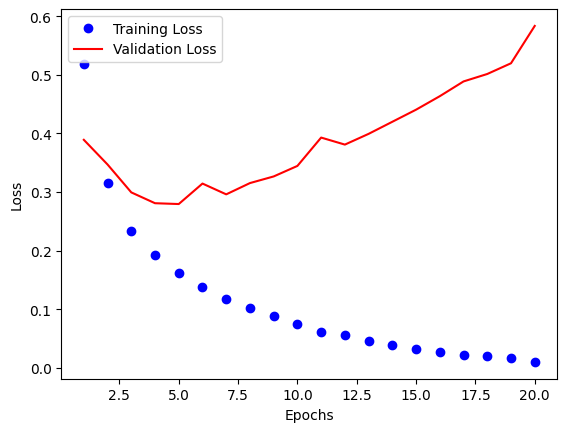

In [18]:
# 결과 시각화 (Loss)

import matplotlib.pyplot as plt

# history의 키값 가져오기
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,loss, 'bo', label='Training Loss') # train 회수와 loss의 상관관계
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')  # train 회수와 val_loss의 상관관계
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 전체의 train 개수는 20개(epoch)
# 점점 loss 값이 줄어드는 걸 알 수 있다.
# 하지만 val_loss값은 오히려 점점 많아짐.
# 가장 최적의 학습 중지 지점은 3번째. 그 이후로는 Train Data에 OverFitting이 시작된다. val_loss도 함께 낮아야함.

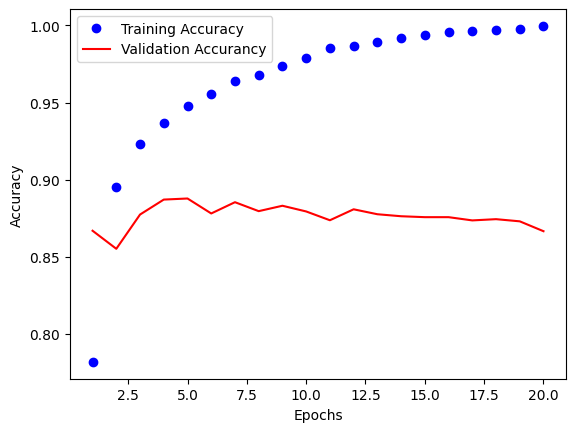

In [19]:
# 결과 시각화 (Accuracy)

plt.plot(epochs,acc, 'bo', label='Training Accuracy') # train 회수와 loss의 상관관계
plt.plot(epochs, val_acc, 'r-', label='Validation Accurancy')  # train 회수와 val_loss의 상관관계
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 3까지는 UnderFitting. 그 이후로는 OverFitting 상태가됨.

In [20]:
# 최적 Epochs 입력

# 신경망 제작
from keras import models
from keras import layers

# Model 제작
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Data 나누기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 최적학습
history = model.fit(partial_x_train, partial_y_train, # 학습에 필요한 data
          epochs=3, batch_size=512,  # 학습 option 설정
          validation_data=(x_val,y_val))  # 검증하는 과정 추가 validation

Epoch 1/3
30/30 [==============================] - 1s 23ms/step - loss: 0.5154 - accuracy: 0.7756 - val_loss: 0.4083 - val_accuracy: 0.8514
Epoch 2/3
30/30 [==============================] - 0s 13ms/step - loss: 0.3212 - accuracy: 0.8947 - val_loss: 0.3122 - val_accuracy: 0.8856
Epoch 3/3
30/30 [==============================] - 0s 11ms/step - loss: 0.2395 - accuracy: 0.9219 - val_loss: 0.2976 - val_accuracy: 0.8826


In [21]:
# 최적 모델 예측 Test

model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.30529916],
       [0.98615324],
       [0.6439098 ],
       ...,
       [0.08438908],
       [0.13152832],
       [0.39875183]], dtype=float32)

In [22]:
# 최적 모델 정확도 Loss 예

test_loss, test_acc = model.evaluate(x_test,y_test)
print('loss={0}','accuracy={1}'.format(test_loss,test_acc))

782/782 [==============================] - 1s 1ms/step - loss: 0.3156 - accuracy: 0.8727
loss={0} accuracy=0.8726800084114075
